In [1]:
# 로이터 뉴스 데이터 로딩
from tensorflow.keras.datasets import reuters
(X_train, y_train), (X_test, y_test)=reuters.load_data(num_words=1000, test_split=0.2) # num_words : 사용할 상위 단어수

In [2]:
from tensorflow.keras.preprocessing import sequence
# 가장 긴 길이를 기준으로 사이즈를 맞추고 남는 부분을 0으로 채움
X_train=sequence.pad_sequences(X_train, maxlen=100)
X_test=sequence.pad_sequences(X_test, maxlen=100)

In [3]:
from keras.utils import np_utils
# 원핫인코딩
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

In [4]:
from tensorflow.keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding

model=Sequential()
# 임베딩 레이어 Embedding(단어의 개수, 벡터 크기, 입력 사이즈)
model.add(Embedding(1000,100)) # 1000개의 단어가 입력되어 100차원으로 출력
# 문장을 단어들의 시퀀스로 간주하고 순환 레이어의 입력으로, 출력 노드수 100
model.add(LSTM(100)) # Long Stort-Term Memory
model.add(Dense(46, activation='softmax')) # 46개의 뉴스 카테고리

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [5]:
hist=model.fit(X_train, y_train, batch_size=100, epochs=30, validation_split=0.2)

Epoch 1/30
72/72 [==============================] - 5s 34ms/step - loss: 2.6044 - accuracy: 0.3627 - val_loss: 2.1366 - val_accuracy: 0.4719
Epoch 2/30
72/72 [==============================] - 2s 27ms/step - loss: 2.0896 - accuracy: 0.4828 - val_loss: 2.0393 - val_accuracy: 0.4903
Epoch 3/30
72/72 [==============================] - 2s 26ms/step - loss: 2.0113 - accuracy: 0.4983 - val_loss: 1.9780 - val_accuracy: 0.4981
Epoch 4/30
72/72 [==============================] - 2s 29ms/step - loss: 1.9062 - accuracy: 0.5127 - val_loss: 1.7950 - val_accuracy: 0.5270
Epoch 5/30
72/72 [==============================] - 2s 29ms/step - loss: 1.7589 - accuracy: 0.5445 - val_loss: 1.7315 - val_accuracy: 0.5437
Epoch 6/30
72/72 [==============================] - 2s 28ms/step - loss: 2.0402 - accuracy: 0.5193 - val_loss: 1.9986 - val_accuracy: 0.5147
Epoch 7/30
72/72 [==============================] - 2s 27ms/step - loss: 2.0330 - accuracy: 0.4912 - val_loss: 1.9458 - val_accuracy: 0.5014
Epoch 8/30
72

In [6]:
print('\n 정확도 : %.4f' % (model.evaluate(X_test,y_test)[1]))

71/71 [==============================] - 0s 6ms/step - loss: 1.2976 - accuracy: 0.7035

 정확도 : 0.7035


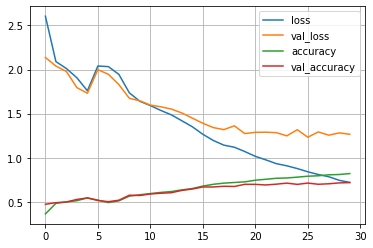

In [7]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss','accuracy','val_accuracy'])
plt.grid()
plt.show()

In [8]:
import numpy as np
pred=model.predict(X_test[12].reshape(-1,50))
np.argmax(pred[0])

9

In [9]:
np.argmax(y_test[12])

1